# Read PODNet results

In [2]:
import json
import numpy as np
import os
import glob

In [2]:
repo_list = os.listdir('./results/podnet')
repo_list.sort()
repo_list

['20230428-1347_podnet_nme_cifar100_5steps',
 '20230428-2006_podnet_nme_cifar100_5steps_pretrained',
 '20230501-0551_podnet_nme_cifar100_10steps',
 '20230501-1351_podnet_nme_cifar100_10steps_pretrained',
 '20230501-2145_podnet_nme_cifar100_25steps',
 '20230502-1204_podnet_nme_cifar100_25steps_pretrained',
 '20230503-0247_podnet_nme_cifar100_50steps',
 '20230504-0220_podnet_nme_cifar100_50steps_pretrained',
 '20230505-0301_cifar_cnn_inc_10',
 '20230505-0831_cifar_cnn_inc_10_pretrained',
 '20230505-1402_cifar_cnn_inc_5',
 '20230505-2037_cifar_cnn_inc_5_pretrained',
 '20230506-0318_cifar_cnn_inc_2',
 '20230506-1323_cifar_cnn_inc_2_pretrained',
 '20230506-2323_cifar_cnn_inc_1',
 '20230507-1600_cifar_cnn_inc_1_pretrained',
 '20230528-2049_tuning_cifar_nme_inc_50_lr_0.1_wd_0.0005',
 '20230528-2331_tuning_cifar_nme_inc_50_lr_0.1_wd_0.0001',
 '20230529-0155_tuning_cifar_nme_inc_50_lr_0.05_wd_0.0005',
 '20230529-0440_tuning_cifar_nme_inc_50_lr_0.05_wd_0.0001',
 '20230529-0701_tuning_cifar_nme_i

In [32]:
inc_list = [6,6,11,11,26,26,51,51,6,6,11,11,26,26,51,51]

In [33]:
def get_avg_acc(repo,inc):
    accs = []
    for seed in range(3):
        with open(repo+'/run_'+str(seed)+'_.json', 'r') as f:
            json_data = json.load(f)

        accs.append(json_data['results'][-1]['incremental_accuracy'])

    accuracy = np.array(accs) * 100
    return accuracy, accuracy.mean(axis=0), accuracy.std(axis=0)

In [34]:
for i in range(16):
    accs, mean, std = get_avg_acc('./results/podnet/'+repo_list[i],inc_list[i])
    print(repo_list[i])
    print(accs)
    print()

20230428-1347_podnet_nme_cifar100_5steps
[61.48333333 60.26666667 63.06666667]

20230428-2006_podnet_nme_cifar100_5steps_pretrained
[63.31666667 61.6        64.35      ]

20230501-0551_podnet_nme_cifar100_10steps
[59.14545455 57.89090909 60.86363636]

20230501-1351_podnet_nme_cifar100_10steps_pretrained
[61.68181818 59.39090909 62.29090909]

20230501-2145_podnet_nme_cifar100_25steps
[55.40769231 54.06153846 57.01153846]

20230502-1204_podnet_nme_cifar100_25steps_pretrained
[57.33461538 56.07307692 59.33076923]

20230503-0247_podnet_nme_cifar100_50steps
[50.79215686 49.00980392 52.71764706]

20230504-0220_podnet_nme_cifar100_50steps_pretrained
[53.1627451  51.34117647 55.28235294]

20230505-0301_cifar_cnn_inc_10
[58.26666667 57.23333333 59.7       ]

20230505-0831_cifar_cnn_inc_10_pretrained
[61.16666667 60.43333333 62.26666667]

20230505-1402_cifar_cnn_inc_5
[55.29090909 54.71818182 57.28181818]

20230505-2037_cifar_cnn_inc_5_pretrained
[58.         57.63636364 59.51818182]

20230506-0

In [24]:
def get_acc(repo,inc):
    accs = []
    for seed in range(3):
        with open(repo+'/run_'+str(seed)+'_.json', 'r') as f:
            json_data = json.load(f)

        acc = []
        for i in range(inc):
            acc.append(json_data['results'][i]['accuracy']['total'])

        accs.append(acc)

    accuracy = np.array(accs) * 100
    return accuracy.mean(axis=0), accuracy.std(axis=0)

In [4]:
non_mean, non_std = get_acc('./results/podnet/20230428-1347_podnet_nme_cifar100_5steps',6)
print(non_mean)
print(non_std)

[73.93333333 68.13333333 62.5        58.8        54.96666667 51.3       ]
[2.24845626 1.59234279 0.64807407 0.65319726 1.25521136 0.82865353]


In [ ]:
for i in range(16):
    mean, std = get_acc('./results/podnet/'+repo_list[i],inc_list[i])
    print(mean)
    print(std)

In [4]:
repo_list = os.listdir('./results/podnet')
repo_list.sort()
repo_list

['20230428-1347_podnet_nme_cifar100_5steps',
 '20230428-2006_podnet_nme_cifar100_5steps_pretrained',
 '20230501-0551_podnet_nme_cifar100_10steps',
 '20230501-1351_podnet_nme_cifar100_10steps_pretrained',
 '20230501-2145_podnet_nme_cifar100_25steps',
 '20230502-1204_podnet_nme_cifar100_25steps_pretrained',
 '20230503-0247_podnet_nme_cifar100_50steps',
 '20230504-0220_podnet_nme_cifar100_50steps_pretrained',
 '20230505-0301_cifar_cnn_inc_10',
 '20230505-0831_cifar_cnn_inc_10_pretrained',
 '20230505-1402_cifar_cnn_inc_5',
 '20230505-2037_cifar_cnn_inc_5_pretrained',
 '20230506-0318_cifar_cnn_inc_2',
 '20230506-1323_cifar_cnn_inc_2_pretrained',
 '20230506-2323_cifar_cnn_inc_1',
 '20230507-1600_cifar_cnn_inc_1_pretrained',
 '20230528-2049_tuning_cifar_nme_inc_50_lr_0.1_wd_0.0005',
 '20230528-2331_tuning_cifar_nme_inc_50_lr_0.1_wd_0.0001',
 '20230529-0155_tuning_cifar_nme_inc_50_lr_0.05_wd_0.0005',
 '20230529-0440_tuning_cifar_nme_inc_50_lr_0.05_wd_0.0001',
 '20230529-0701_tuning_cifar_nme_i

In [35]:
file_list = glob.glob('./results/icarl/*tuning_cpodnet*/*.json')
file_list

['./results/icarl/20230601-1653_tuning_cpodnet_res_inc_50_lr_1_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1654_tuning_cpodnet_vit_inc_50_lr_0.001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1743_tuning_cpodnet_vit_inc_50_lr_0.00001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1654_tuning_cpodnet_vit_inc_50_lr_0.1_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1750_tuning_cpodnet_res_inc_50_lr_0.00001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1718_tuning_cpodnet_vit_inc_50_lr_0.0001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1723_tuning_cpodnet_res_inc_50_lr_0.0001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1752_tuning_cpodnet_res_inc_50_lr_0.01_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1653_tuning_cpodnet_res_inc_50_lr_0.001_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1725_tuning_cpodnet_res_inc_50_lr_0.1_wd_0.00005/run_0_.json',
 './results/icarl/20230601-1719_tuning_cpodnet_vit_inc_50_lr_0.01_wd_0.00005/run_0_

In [36]:
def get_acc(repo,inc):
    accs = []
    for seed in range(3):
        with open(repo+'/run_'+str(seed)+'_.json', 'r') as f:
            json_data = json.load(f)

        accs.append(json_data['results'][-1]['incremental_accuracy'])

    accuracy = np.array(accs) * 100
    return accuracy, accuracy.mean(axis=0), accuracy.std(axis=0)

In [37]:
for file in file_list:
    net = file[45:48]
    hype_setting = file[56:-12]
    with open(file,'r') as f:
        json_data = json.load(f)
    acc = json_data['results'][-1]['incremental_accuracy']
    print(net,hype_setting,acc)

res lr_1_wd_0.00005 0.039
vit lr_0.001_wd_0.00005 0.112
vit lr_0.00001_wd_0.00005 0.5095
vit lr_0.1_wd_0.00005 0.0425
res lr_0.00001_wd_0.00005 0.1645
vit lr_0.0001_wd_0.00005 0.2965
res lr_0.0001_wd_0.00005 0.0795
res lr_0.01_wd_0.00005 0.1245
res lr_0.001_wd_0.00005 0.0625
res lr_0.1_wd_0.00005 0.163
vit lr_0.01_wd_0.00005 0.6865


# 폴더 아래 있는 결과 전부 불러오는 코드

In [84]:
file_list = glob.glob('./results/podnet/20230609*/*.json')
file_list

['./results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/run_0_.json',
 './results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/run_1_.json',
 './results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/run_2_.json',
 './results/podnet/20230609-1423_resnet50_cifar_nme_inc_1/run_0_.json',
 './results/podnet/20230609-1423_resnet50_cifar_nme_inc_1/run_1_.json',
 './results/podnet/20230609-1423_resnet50_cifar_nme_inc_1/run_2_.json',
 './results/podnet/20230609-1420_resnet50_cifar_nme_inc_10/run_0_.json',
 './results/podnet/20230609-1420_resnet50_cifar_nme_inc_10/run_1_.json',
 './results/podnet/20230609-1420_resnet50_cifar_nme_inc_10/run_2_.json',
 './results/podnet/20230609-1424_resnet50_cifar_cnn_inc_1/run_0_.json',
 './results/podnet/20230609-1424_resnet50_cifar_cnn_inc_1/run_1_.json',
 './results/podnet/20230609-1424_resnet50_cifar_cnn_inc_1/run_2_.json',
 './results/podnet/20230609-1421_resnet50_cifar_cnn_inc_10/run_0_.json',
 './results/podnet/20230609-1421_resnet50_cifar_cnn_inc_10/r

In [85]:
for file in file_list:
    with open(file,'r') as f:
        json_data = json.load(f)
    acc = json_data['results'][-1]['incremental_accuracy']
    print(acc, file[46:-12], file[-11:-6])

0.6155384615384616 nme_inc_2 run_0
0.5527307692307694 nme_inc_2 run_1
0.6094999999999999 nme_inc_2 run_2
0.5495686274509803 nme_inc_1 run_0
0.5037450980392159 nme_inc_1 run_1
0.5639019607843136 nme_inc_1 run_2
0.6591666666666667 nme_inc_10 run_0
0.6113333333333334 nme_inc_10 run_1
0.6631666666666667 nme_inc_10 run_2
0.4762352941176469 cnn_inc_1 run_0
0.49407843137254887 cnn_inc_1 run_1
0.4935686274509804 cnn_inc_1 run_2
0.6395000000000001 cnn_inc_10 run_0
0.6376666666666667 cnn_inc_10 run_1
0.6506666666666666 cnn_inc_10 run_2
0.608 cnn_inc_5 run_0
0.6076363636363636 cnn_inc_5 run_1
0.6173636363636363 cnn_inc_5 run_2
0.6418181818181817 nme_inc_5 run_0
0.589 nme_inc_5 run_1
0.6426363636363637 nme_inc_5 run_2
0.5491923076923076 cnn_inc_2 run_0
0.5504230769230769 cnn_inc_2 run_1
0.559076923076923 cnn_inc_2 run_2


# 230610 결과 확인

In [99]:
file_list = glob.glob('./results/pretrained/*full*/*.json')
file_list

['./results/pretrained/20230610-0256_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230610-1449_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json',
 './results/pretrained/20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json',
 './results/pretrained/20230610-0657_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230610-0840_full_ep20_lr0.01_wd0.001-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json',
 './results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json',
 './results/pretrained/20230610-1616

In [100]:
for file in file_list:
    with open(file,'r') as f:
        json_data = json.load(f)
    acc = json_data['results'][-1]['incremental_accuracy']
    print('S =',json_data['config']['increment'], np.round(acc*100,2), file[21:])

S = 5 46.63 20230610-0256_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 1 10.61 20230610-1449_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 2 24.93 20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 2 25.7 20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json
S = 2 27.02 20230610-1616_full_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json
S = 2 24.28 20230610-0657_full_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 2 23.1 20230610-0840_full_ep20_lr0.01_wd0.001-ft_ep20_lr0.05-k5/run_0_.json
S = 10 59.4 20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 10 59.15 20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json
S = 10 62.55 20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json
S = 10 59.4 20230610-1616_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json
S = 10 59.15 20230610-1616_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1

In [3]:
file_list = glob.glob('./results/pretrained2/*full*/*.json')
file_list

['./results/pretrained2/20230612-0605_full2_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained2/20230612-0605_full2_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json',
 './results/pretrained2/20230612-0724_full2_inc1_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained2/20230612-0543_full2_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained2/20230612-0543_full2_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json',
 './results/pretrained2/20230612-0543_full2_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json',
 './results/pretrained2/20230612-0753_full2_inc2_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained2/20230612-0605_full2_inc5_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_0_.json',
 './results/pretrained2/20230612-0605_full2_inc5_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_1_.json',
 './results/pretrained2/20230612-0605_full2_inc5_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5/run_2_.json

In [9]:
for file in file_list:
    with open(file,'r') as f:
        json_data = json.load(f)
    acc = json_data['results'][-1]['incremental_accuracy']
    seed = json_data['config']['classes_order'][0][0]
    print('S =',json_data['config']['increment'], np.round(acc*100,2), seed, file[-11:-6])

S = 2 71.97 87 run_0
S = 2 73.3 58 run_1
S = 1 73.79 71 run_0
S = 10 71.32 87 run_0
S = 10 73.33 58 run_1
S = 10 73.52 71 run_2
S = 2 73.3 58 run_0
S = 5 71.48 87 run_0
S = 5 73.17 58 run_1
S = 5 73.53 71 run_2
S = 1 73.1 58 run_0
S = 1 72.03 87 run_0
S = 2 73.58 71 run_0
S = 5 73.53 71 run_0


# 테스트용 코드

In [38]:
import torch

num_features = 100
projection = torch.nn.Linear(2048, 100)
opt = torch.optim.AdamW(projection.parameters(), lr=0.01, weight_decay=0.01)
Q,R = torch.linalg.qr(projection.weight.detach().T)
feature_space = projection.weight.detach().T

In [40]:
feature_space.shape

torch.Size([2048, 100])

In [41]:
Q.shape

torch.Size([2048, 100])

In [42]:
R.shape

torch.Size([100, 100])

In [43]:
(Q * torch.diag(R)).T.shape

torch.Size([100, 2048])

In [45]:
projection.weight.data.shape

torch.Size([100, 2048])

In [50]:
test_projection = torch.nn.ParameterList([])
test_projection.append(torch.nn.Parameter(torch.randn(10, 2048)))
test_projection

ParameterList(  (0): Parameter containing: [torch.float32 of size 10x2048])

In [51]:
test_projection.append(torch.nn.Parameter(torch.randn(10, 2048)))
test_projection

ParameterList(
    (0): Parameter containing: [torch.float32 of size 10x2048]
    (1): Parameter containing: [torch.float32 of size 10x2048]
)

In [54]:
test_param = torch.nn.Parameter(torch.randn(50,2048))
test_param = torch.cat([test_param,torch.nn.Parameter(torch.randn(10,2048))])
(test_param[-10:,:]).shape

torch.Size([10, 2048])

# 빈 폴더 지우는 코드

In [95]:
import os

def remove_empty_folders(path):
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            full_path = os.path.join(root, dir)
            if not os.listdir(full_path) and not dir.startswith("2023061"):
                os.rmdir(full_path)
                print(f"Removed empty folder: {full_path}")

In [ ]:
remove_empty_folders("results/pretrained")

In [27]:
import os

def remove_empty_folders(path):
    for root, dirs, files in os.walk(path):
        for dir in dirs:
            full_path = os.path.join(root, dir)
            if not os.listdir(full_path):
                os.rmdir(full_path)
                print(f"Removed empty folder: {full_path}")

In [31]:
remove_empty_folders("results\icarl")

# 쓸모없는`.pkl` `.pth` 파일 지우는 코드

In [32]:
import os
import glob

def delete_files_with_extension(path, exts, exclude_dirs):
    for root, dirs, files in os.walk(path):
        dirs[:] = [d for d in dirs if d not in exclude_dirs]
        for file in files:
            if file.endswith(exts):
                os.remove(os.path.join(root, file))
                print(f"Deleted {os.path.join(root, file)}")

In [34]:
# delete_files_with_extension("results", (".pkl", ".pth"), ["A", "B", "C"])
delete_files_with_extension("results", (".pkl",".pth"), 
                            ["results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5",
                             "results/pretrained2/20230612-0543_full2_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5"])

Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_2_task_0.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_1_task_24.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_0_task_22.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_2_task_3.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_2_task_14.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_0_task_23.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_1_task_9.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_1_task_14.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_0_task_14.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_2_task_7.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_0_task_4.pth
Deleted results/podnet/20230609-1422_resnet50_cifar_nme_inc_2/net_1_task_5.pth
Deleted results/podnet/20230609-1422_resnet50_

# 230611 results plotting

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import glob

In [103]:
base_path = 'results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5'
with open(base_path+'/run_0_.json','r') as f:
    json_data = json.load(f)

In [16]:
task_classes = ['00-09','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
colors = ['k','r','y','g','b','c']
task_ids = []
for i in range(6):
    task_id = []
    for j in range(6-i):
        task_id.append(i+j)
    task_ids.append(np.array(task_id))
print(task_ids)

[array([0, 1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5]), array([2, 3, 4, 5]), array([3, 4, 5]), array([4, 5]), array([5])]


In [114]:
json_data['results'][-1]['accuracy']

{'total': 0.534,
 '00-09': 0.573,
 '10-19': 0.499,
 '20-29': 0.386,
 '30-39': 0.448,
 '40-49': 0.51,
 '50-59': 0.665,
 '60-69': 0.49,
 '70-79': 0.627,
 '80-89': 0.64,
 '90-99': 0.5}

In [136]:
base_accs = []
for results in json_data['results']:
    print(results['task_id'])
    base_acc = []
    for i in range(5):
        base_acc.append(results['accuracy'][task_classes[i]])
    base_accs.append(np.mean(base_acc))
print(base_accs)

0
1
2
3
4
5
[0.7248, 0.6192, 0.5626, 0.567, 0.5016, 0.4832000000000001]


In [129]:
new_accs = []
for i in range(5):
    print('cur i =',i)
    new_accs.append([])
    for j in range(i+1):
        print('  j =',j,task_classes[j+5],json_data['results'][i+1]['accuracy'][task_classes[j+5]])
        new_accs[j].append(json_data['results'][i+1]['accuracy'][task_classes[j+5]])

print(new_accs)

cur i = 0
  j = 0 50-59 0.68
cur i = 1
  j = 0 50-59 0.692
  j = 1 60-69 0.49
cur i = 2
  j = 0 50-59 0.64
  j = 1 60-69 0.459
  j = 2 70-79 0.57
cur i = 3
  j = 0 50-59 0.689
  j = 1 60-69 0.452
  j = 2 70-79 0.655
  j = 3 80-89 0.57
cur i = 4
  j = 0 50-59 0.665
  j = 1 60-69 0.49
  j = 2 70-79 0.627
  j = 3 80-89 0.64
  j = 4 90-99 0.5
[[0.68, 0.692, 0.64, 0.689, 0.665], [0.49, 0.459, 0.452, 0.49], [0.57, 0.655, 0.627], [0.57, 0.64], [0.5]]


In [137]:
full_accs = []
for task_acc in [base_accs] + new_accs:
    full_accs.append(np.array(task_acc))
print(full_accs)

[array([0.7248, 0.6192, 0.5626, 0.567 , 0.5016, 0.4832]), array([0.68 , 0.692, 0.64 , 0.689, 0.665]), array([0.49 , 0.459, 0.452, 0.49 ]), array([0.57 , 0.655, 0.627]), array([0.57, 0.64]), array([0.5])]


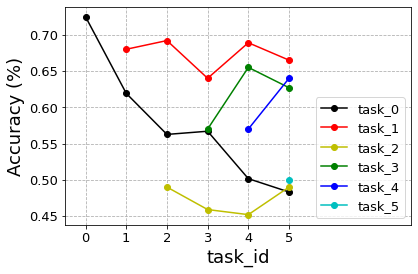

In [146]:
plt.figure()
plt.rc('font', size=13)
for i in range(6):
    plt.plot(task_ids[i], full_accs[i], color=colors[i], marker='o', label="task_"+str(i))
    # plt.fill_between(task_ids[i], full_accs[i] - std, mean + std, color=colors[i], alpha=0.2)
plt.xticks(task_ids[0], task_ids[0])
plt.xlabel(r'task_id', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)
plt.xlim(-0.5, 8)
# plt.ylim(50,90)
plt.legend(loc='lower right')
plt.grid(linestyle='--')
plt.tight_layout()
# plt.savefig("Figures/avg_vne_s" + str(S) + ".jpg", bbox_inches='tight', transparent=True, dpi=440)
plt.show()

# 표준편차까지 해서 다시

In [24]:
base_path = 'results/pretrained/20230611-0026_full_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5'
# base_path = 'results/pretrained2/20230612-0543_full2_inc10_ep20_lr0.01_wd0.01-ft_ep20_lr0.05-k5'

full_accs_seed = []
for i in range(3):
    with open(base_path+'/run_'+str(i)+'_.json','r') as f:
        json_data = json.load(f)

    base_accs = []
    for i, results in enumerate(json_data['results']):
        # print(i, results['task_id'])
        base_acc = []
        for i in range(5):
            base_acc.append(results['accuracy'][task_classes[i]])
        base_accs.append(np.mean(base_acc))
    # print(base_accs)

    new_accs = []
    for i in range(5):
        # print('cur i =',i)
        new_accs.append([])
        for j in range(i+1):
            # print('  j =',j,task_classes[j+5],json_data['results'][(i+1)*1]['accuracy'][task_classes[j+5]])
            new_accs[j].append(json_data['results'][(i+1)*1]['accuracy'][task_classes[j+5]])
    # print(new_accs)

    full_accs = []
    for task_acc in [base_accs] + new_accs:
        full_accs.append(np.array(task_acc))
    # print(full_accs)
    
    full_accs_seed.append(full_accs)

print(full_accs_seed)

[[array([0.7248, 0.6192, 0.5626, 0.567 , 0.5016, 0.4832]), array([0.68 , 0.692, 0.64 , 0.689, 0.665]), array([0.49 , 0.459, 0.452, 0.49 ]), array([0.57 , 0.655, 0.627]), array([0.57, 0.64]), array([0.5])], [array([0.7334, 0.6524, 0.5588, 0.56  , 0.5266, 0.497 ]), array([0.612, 0.576, 0.589, 0.483, 0.532]), array([0.607, 0.478, 0.526, 0.602]), array([0.598, 0.578, 0.544]), array([0.428, 0.592]), array([0.522])], [array([0.7894, 0.6678, 0.6462, 0.6314, 0.5596, 0.5554]), array([0.624, 0.574, 0.545, 0.437, 0.46 ]), array([0.586, 0.484, 0.481, 0.48 ]), array([0.621, 0.669, 0.59 ]), array([0.517, 0.559]), array([0.445])]]


In [21]:
base_path = 'results/icarl/20230611-1532_icarl_cifar100_50steps_frz_lr1e-2'
full_accs_seed = []
for i in range(3):
    with open(base_path+'/run_'+str(i)+'_.json','r') as f:
        json_data = json.load(f)

    base_accs = []
    for i, results in enumerate(json_data['results']):
        if i % 10 != 0:
            continue
        # print(i, results['task_id'])
        base_acc = []
        for i in range(5):
            base_acc.append(results['accuracy'][task_classes[i]])
        base_accs.append(np.mean(base_acc))
    # print(base_accs)

    new_accs = []
    for i in range(5):
        # print('cur i =',i)
        new_accs.append([])
        for j in range(i+1):
            # print('  j =',j,task_classes[j+5],json_data['results'][(i+1)*10]['accuracy'][task_classes[j+5]])
            new_accs[j].append(json_data['results'][(i+1)*10]['accuracy'][task_classes[j+5]])
    # print(new_accs)

    full_accs = []
    for task_acc in [base_accs] + new_accs:
        full_accs.append(np.array(task_acc))
    # print(full_accs)
    
    full_accs_seed.append(full_accs)

print(full_accs_seed)

[[array([0.7208, 0.7078, 0.682 , 0.6666, 0.653 , 0.6364]), array([0.78 , 0.764, 0.757, 0.75 , 0.742]), array([0.638, 0.629, 0.625, 0.62 ]), array([0.735, 0.723, 0.719]), array([0.693, 0.685]), array([0.638])], [array([0.7436, 0.7184, 0.708 , 0.6814, 0.6684, 0.6502]), array([0.687, 0.672, 0.651, 0.65 , 0.634]), array([0.713, 0.695, 0.691, 0.689]), array([0.729, 0.708, 0.691]), array([0.664, 0.638]), array([0.683])], [array([0.7508, 0.7356, 0.7194, 0.7056, 0.6954, 0.685 ]), array([0.655, 0.635, 0.622, 0.608, 0.593]), array([0.628, 0.621, 0.606, 0.595]), array([0.711, 0.699, 0.697]), array([0.704, 0.681]), array([0.595])]]


In [25]:
full_accs_mean = []
full_accs_std = []

for i in range(6):
    accs_mean = []
    accs_std = []
    for j in range(6-i):
        accs_mean.append(np.mean([full_accs_seed[0][i][j]*100,
                                  full_accs_seed[1][i][j]*100,
                                  full_accs_seed[2][i][j]*100]))
        accs_std.append(np.std([full_accs_seed[0][i][j]*100,
                                full_accs_seed[1][i][j]*100,
                                full_accs_seed[2][i][j]*100]))
    full_accs_mean.append(np.array(accs_mean))
    full_accs_std.append(np.array(accs_std))

print(full_accs_mean)
print(full_accs_std)

[array([74.92      , 64.64666667, 58.92      , 58.61333333, 52.92666667,
       51.18666667]), array([63.86666667, 61.4       , 59.13333333, 53.63333333, 55.23333333]), array([56.1       , 47.36666667, 48.63333333, 52.4       ]), array([59.63333333, 63.4       , 58.7       ]), array([50.5, 59.7]), array([48.9])]
[array([2.86416945, 2.02796011, 4.03349311, 3.21356846, 2.37533623,
       3.12940179]), array([ 2.96348144,  5.51603722,  3.88186668, 10.95729082,  8.49169529]), array([5.09313263, 1.06562449, 3.044485  , 5.53052137]), array([2.08539898, 4.00083325, 3.3950945 ]), array([5.85889637, 3.32565783]), array([3.23831232])]


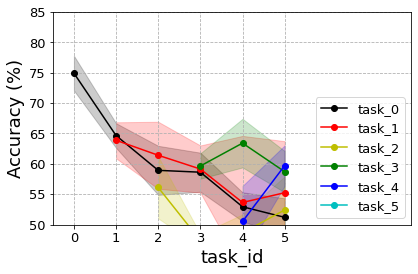

In [26]:
plt.figure()
plt.rc('font', size=13)
for i in range(6):
    plt.plot(task_ids[i], full_accs_mean[i], color=colors[i], marker='o', label="task_"+str(i))
    plt.fill_between(task_ids[i],
                     full_accs_mean[i] - full_accs_std[i],
                     full_accs_mean[i] + full_accs_std[i],
                     color=colors[i], alpha=0.2)
plt.xticks(task_ids[0], task_ids[0])
plt.xlabel(r'task_id', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)
plt.xlim(-0.5, 8)
plt.ylim(50,85)
plt.legend(loc='lower right')
plt.grid(linestyle='--')
plt.tight_layout()
plt.savefig("results/figs/orthogonal.jpg", bbox_inches='tight', transparent=True, dpi=440)
plt.show()